# **2. Image I/O and Color Spaces**
Image I/O (Input/Output) is the foundation of all image processing tasks. OpenCV provides easy methods to read, display, save, and convert between color spaces such as BGR, RGB, Grayscale, HSV, LAB, and YCrCb. Understanding these basics is essential before applying advanced techniques.

- Reading, displaying, saving images
- Resizing, cropping images
- Color spaces:
  - RGB ↔ BGR
  - RGB ↔ Grayscale
  - HSV, LAB, YCrCb
- Channel separation & visualization

## **2.1 Reading, Displaying, and Saving Images**

OpenCV reads images in BGR format, while Matplotlib displays images in RGB format.
Therefore, we must convert BGR → RGB when showing images with Matplotlib.

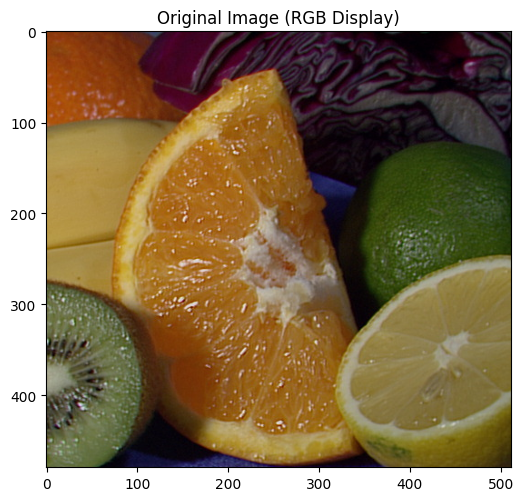

In [ ]:
# Load and Display an Image

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("fruits.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Original Image (RGB Display)");

In [ ]:
# Save an Image
cv2.imwrite("output_fruits.jpg", img)

True

## **2.2 Resizing and Cropping**

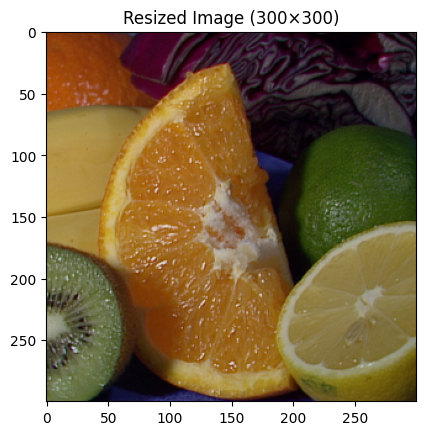

In [ ]:
# Resize Image
resized = cv2.resize(img, (300, 300))

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (300×300)");

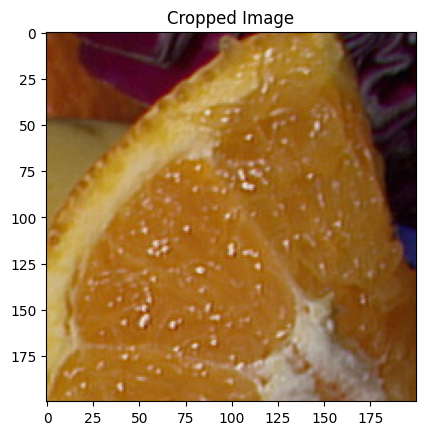

In [ ]:
# Crop Image
# Crop a region: y1:y2 , x1:x2
crop = img[50:250, 100:300]

plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image");

## **2.3 Color Space Conversions**

OpenCV supports many color models.
Below are the most commonly used:

In [ ]:
# BGR ↔ RGB: Matplotlib uses RGB → so convert before showing.
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)

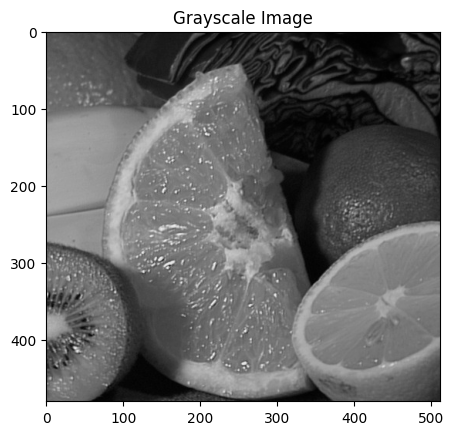

In [ ]:
# BGR → Grayscale: Grayscale is essential for thresholding, edge detection, morphology.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image");

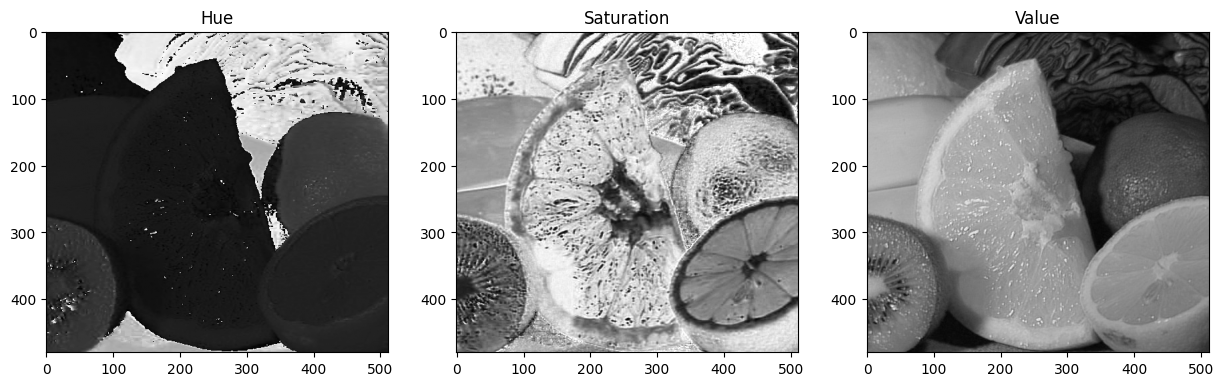

In [ ]:
# BGR → HSV: HSV separates color (Hue) and intensity, making it ideal for color segmentation.
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(15,5))
titles = ["Hue", "Saturation", "Value"]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(hsv[:,:,i], cmap='gray')
    plt.title(titles[i]);

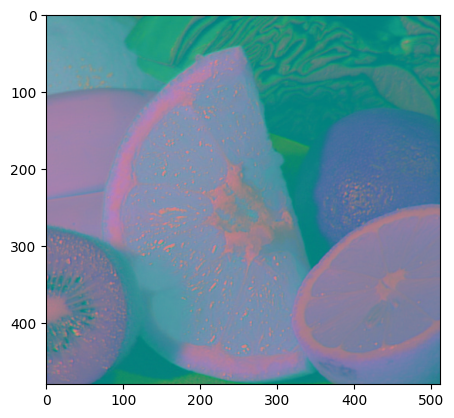

In [ ]:
# BGR → LAB: LAB is great for brightness and contrast manipulation.
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab);

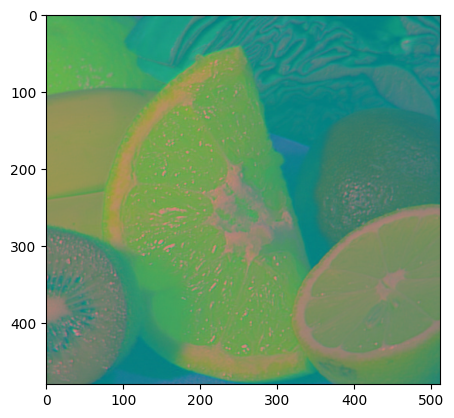

In [ ]:
# BGR → YCrCb: Used widely in skin detection, compression (JPEG), and illumination-invariant processing.
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
plt.imshow(ycrcb);

## **2.4 Channel Separation & Visualization**
You can split the image into its R/G/B channels.

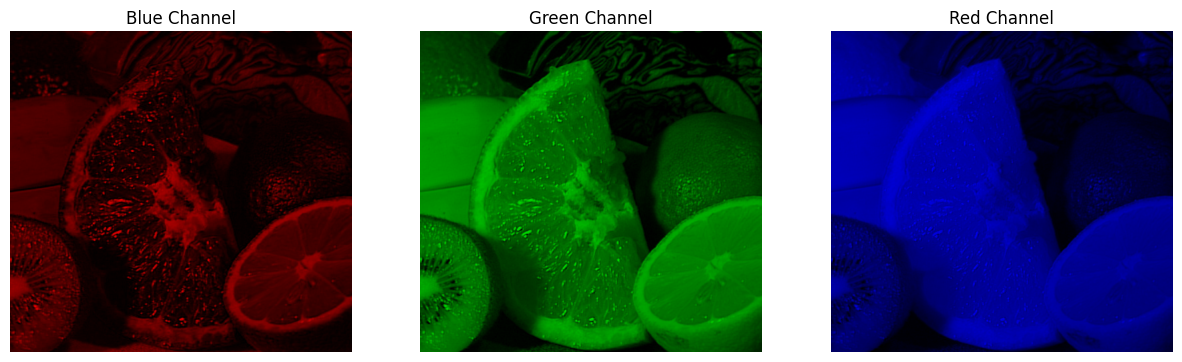

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

b, g, r = cv2.split(img)

# Build pure color images
blue_img  = np.stack([b, np.zeros_like(b), np.zeros_like(b)], axis=-1)
green_img = np.stack([np.zeros_like(g), g, np.zeros_like(g)], axis=-1)
red_img   = np.stack([np.zeros_like(r), np.zeros_like(r), r], axis=-1)

plt.figure(figsize=(15,5))
colored_channels = [blue_img, green_img, red_img]
titles = ["Blue Channel", "Green Channel", "Red Channel"]

for i, (ch, title) in enumerate(zip(colored_channels, titles)):
    plt.subplot(1, 3, i+1)
    plt.imshow(ch)
    plt.title(title)
    plt.axis("off")


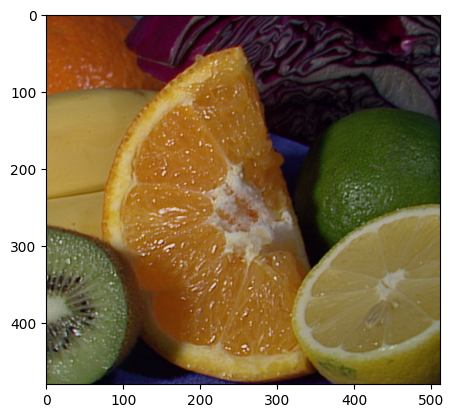

In [ ]:
merged = cv2.merge([r, g, b])
plt.imshow(merged);